## Objective: 

The goal is to predict the gold price. The model is trained and tested using RandomForest Regressor which is a Regression type Model.

## Importing Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

## Read and load the dataset

In [2]:
gold_data = pd.read_csv('./gld_price_data.csv')

In [3]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


* SPX - The Standard and Poor's 500, 500 large companies listed on stock exchanges in the United States.
* GLD - Gold price
* USO - Unites state Oil Price
* SLV - Silver Price
* USD - Unite states dollar
* EUR - Euro

In [4]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [5]:
gold_data.shape

(2290, 6)

In [6]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

## Statistical Measures on data

In [8]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882499,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [9]:
# finding the correleation between each features

correlation = gold_data.corr()
correlation

,SPX,GLD,USO,SLV,EUR/USD
SPX,1.000000,0.049345,-0.591573,-0.274055,-0.672017
GLD,0.049345,1.000000,-0.186360,0.866632,-0.024375
USO,-0.591573,-0.186360,1.000000,0.167547,0.829317
SLV,-0.274055,0.866632,0.167547,1.000000,0.321631
EUR/USD,-0.672017,-0.024375,0.829317,0.321631,1.000000


<AxesSubplot:>

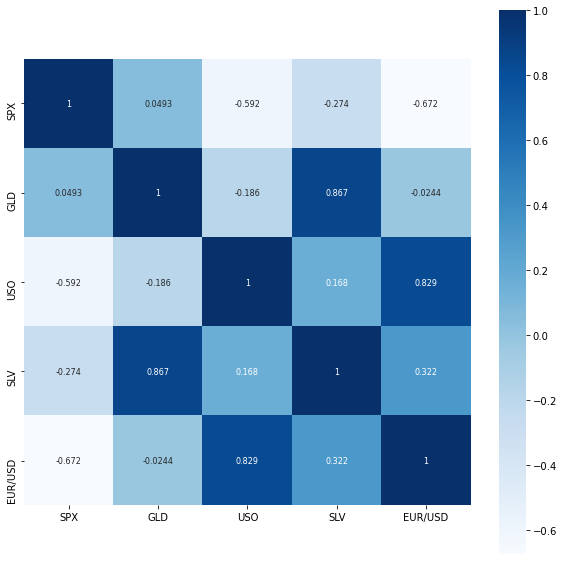

In [10]:
# Picturizing the heatmap using correlation
plt.figure(figsize=(10,10))

sns.heatmap(correlation,cbar = True, annot=True, annot_kws={'size':8},square=True, fmt = '.3g',cmap = 'Blues')

In [11]:
# correlation values with respect to gold

print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


E:\Python\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

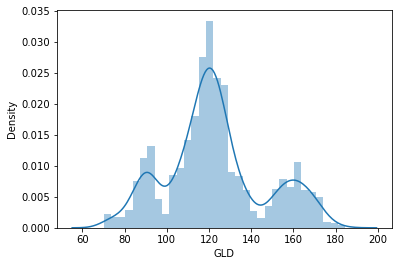

In [12]:
# checking the distribution of gold price
sns.distplot(gold_data['GLD'])

## Splitting the Feature and Target

In [13]:
gold_data.drop(columns='Date',axis=1,inplace=True)

In [14]:
gold_data.shape

(2290, 5)

In [15]:
gold_data=gold_data.rename(columns = {"EUR/USD":"USD"}) 

In [16]:
X = gold_data.drop('GLD',axis=1)
y = gold_data['GLD']

In [17]:
X.shape,y.shape

((2290, 4), (2290,))

In [18]:
X.head()

,SPX,USO,SLV,USD
0,1447.160034,78.470001,15.180,1.471692
1,1447.160034,78.370003,15.285,1.474491
2,1411.630005,77.309998,15.167,1.475492
3,1416.180054,75.500000,15.053,1.468299
4,1390.189941,76.059998,15.590,1.557099


In [19]:
y.head()

0    84.860001
1    85.570000
2    85.129997
3    84.769997
4    86.779999
Name: GLD, dtype: float64

## Splitting the Dataset for Training and Testing

In [20]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 2)

## Training the Model

In [21]:
rf_model = RandomForestRegressor(n_estimators=200)

In [22]:
rf_model.fit(X_train,y_train)

RandomForestRegressor(n_estimators=200)

## Model Evaluation

In [23]:
prediction = rf_model.predict(X_test)

## Checking the model accuracy

In [24]:
error = metrics.r2_score(y_test,prediction)

print("R squarred error:", error)

R squarred error: 0.9892162266569312


## CREATING A PREDICTION SYSTEM

In [25]:
input_data = (683.380005,27.99,13.18,1.263807)

#converting list of values into array
input_array  = np.asarray(input_data)

#reshaping the array
reshaped_array = input_array.reshape(1,-1)

#predicting the input either it is rock or mine
predicted_value = rf_model.predict(reshaped_array)

print(predicted_value)

[92.17350042]


## Saving the model

In [26]:
import pickle

In [27]:
file = open('Gold_prediction_model.pkl','wb')

pickle.dump(rf_model,file)

## Load the saved model

In [28]:
loaded_model = pickle.load(open('Gold_prediction_model.pkl','rb'))

In [29]:
loaded_model

RandomForestRegressor(n_estimators=200)